In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Default parameter for matplotlib
mpl.rcParams['figure.dpi'] = 100

In [3]:
with open('/home/chenghung/DoTA/input/rf_data/human_weight_rf_data.pickle', mode='rb') as fh:
    x_data, y, tf_list = pickle.load(fh)

In [4]:
# Create psi table
psi_df = y.pivot(index='Gene', columns='Tissue')['PSI']

In [5]:
# Remove genes with less than 3 events
psi_df = psi_df[psi_df.notna().sum(axis=1) > 2]

# Calculate stdev
psi_stdev = psi_df.std(axis=1, ddof=0)

# Drop genes with no stdev across different tissues
keep_idx = psi_stdev[psi_stdev != 0].index
psi_df = psi_df.loc[keep_idx]
psi_stdev = psi_stdev[keep_idx]
psi_mean = psi_df.mean(axis=1)

In [20]:
list(keep_idx)

['ENSG00000000419',
 'ENSG00000000457',
 'ENSG00000000971',
 'ENSG00000001167',
 'ENSG00000001460',
 'ENSG00000001461',
 'ENSG00000001497',
 'ENSG00000001617',
 'ENSG00000001629',
 'ENSG00000001631',
 'ENSG00000002016',
 'ENSG00000002330',
 'ENSG00000002549',
 'ENSG00000002746',
 'ENSG00000002822',
 'ENSG00000002834',
 'ENSG00000002919',
 'ENSG00000002933',
 'ENSG00000003056',
 'ENSG00000003096',
 'ENSG00000003137',
 'ENSG00000003147',
 'ENSG00000003249',
 'ENSG00000003393',
 'ENSG00000003400',
 'ENSG00000003402',
 'ENSG00000003436',
 'ENSG00000003509',
 'ENSG00000003756',
 'ENSG00000003987',
 'ENSG00000003989',
 'ENSG00000004399',
 'ENSG00000004455',
 'ENSG00000004468',
 'ENSG00000004478',
 'ENSG00000004487',
 'ENSG00000004534',
 'ENSG00000004700',
 'ENSG00000004766',
 'ENSG00000004777',
 'ENSG00000004779',
 'ENSG00000004838',
 'ENSG00000004864',
 'ENSG00000004866',
 'ENSG00000004897',
 'ENSG00000004948',
 'ENSG00000005007',
 'ENSG00000005100',
 'ENSG00000005102',
 'ENSG00000005156',


In [23]:
y[y['Gene'].isin(keep_idx)].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            119412, 119413, 119414, 119415, 119416, 119418, 119419, 119420,
            119421, 119422],
           dtype='int64', length=117639)

In [6]:
# Calculate psi range of each genes
psi_range = psi_df.max(axis=1) - psi_df.min(axis=1)

In [7]:
gene_remain = []
cutoffs = np.arange(0, 1.05, 0.05)
for cutoff in cutoffs:
    gene_remain.append((psi_range >= cutoff).sum())
gene_remain_df = pd.DataFrame(gene_remain, index=cutoffs, columns=['Count'])

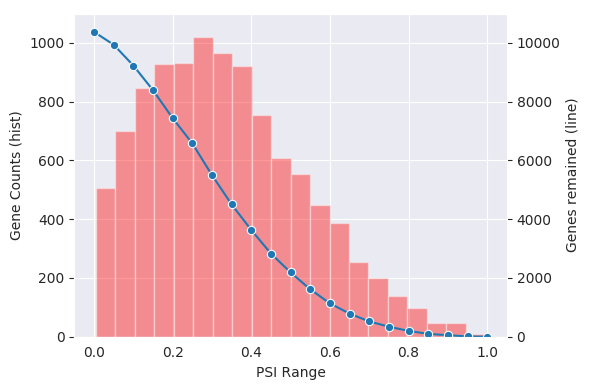

In [8]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    plt.xlabel('PSI Range')

    # Histogram of psi range distribution
    sns.distplot(psi_range, kde=False, norm_hist=False, bins=20, ax=ax, color='r')
    ax.set_ylabel('Gene Counts (hist)')
    ax.set_ylim(0, 1100)

    # Lineplot of genes remained after filtering by each psi-range criteria
    ax2 = plt.twinx()
    sns.lineplot(data=gene_remain_df, markers='o', legend=False, ax=ax2)
    ax2.set_ylabel('Genes remained (line)')
    ax2.set_ylim(0, 11000)
    ax2.grid(None)

    fig.tight_layout()
    # fig.savefig('cutoff_gene_remains.png', dpi=300)
    plt.show()

## Cut-off genes with PSI range < 0.2

In [24]:
with open('/home/chenghung/DoTA/input/rf_data/human_weight_rf_data.pickle', mode='rb') as fh:
    x_data, y, tf_list = pickle.load(fh)

In [25]:
# Create psi table
psi_df = y.pivot(index='Gene', columns='Tissue')['PSI']

In [26]:
# Cut-off genes with psi range < 0.2
psi_range = psi_df.max(axis=1) - psi_df.min(axis=1)
gene_remained_list = psi_range[psi_range >= 0.2]
psi_df = psi_df[psi_df.index.isin(gene_remained_list.index)]

Gene
ENSG00000000419    0.2600
ENSG00000000457    0.3850
ENSG00000001167    0.8800
ENSG00000001460    0.6700
ENSG00000001497    0.2400
ENSG00000001617    0.4400
ENSG00000001631    0.5650
ENSG00000002016    0.5900
ENSG00000002822    0.5000
ENSG00000002834    0.4100
ENSG00000002919    0.4200
ENSG00000003096    0.5300
ENSG00000003137    0.4800
ENSG00000003147    0.3150
ENSG00000003249    0.6300
ENSG00000003393    0.3200
ENSG00000003436    0.4300
ENSG00000003509    0.2600
ENSG00000003987    0.3000
ENSG00000003989    0.4700
ENSG00000004455    0.8600
ENSG00000004468    0.2900
ENSG00000004487    0.4850
ENSG00000004534    0.3450
ENSG00000004700    0.5300
ENSG00000004766    0.2800
ENSG00000004838    0.3700
ENSG00000004864    0.7950
ENSG00000004866    0.3600
ENSG00000004897    0.2950
                    ...  
ENSG00000269534    0.2400
ENSG00000269640    0.2400
ENSG00000269699    0.4200
ENSG00000269834    0.5800
ENSG00000269891    0.3900
ENSG00000269893    0.4400
ENSG00000269897    0.3300
ENSG000

In [78]:
# Remove genes with less than 3 events
psi_df = psi_df[psi_df.notna().sum(axis=1) > 2]

In [79]:
filtered_y = y[y['Gene'].isin(psi_df.index)]

In [85]:
filtered_x_data = x_data[filtered_y.index]
filtered_y.reset_index(drop=True, inplace=True)

In [91]:
# Regenerate data with filtered one
with open('/home/chenghung/DoTA/input/rf_data/human_weight_rf_data_filtered.pickle', mode='wb') as fh:
    pickle.dump((filtered_x_data, filtered_y, tf_list), fh)